In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
mpg = sns.load_dataset('mpg')

In [3]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [4]:
mpg.horsepower.fillna(mpg.horsepower.mean().round(0),inplace=True)

In [5]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [6]:
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


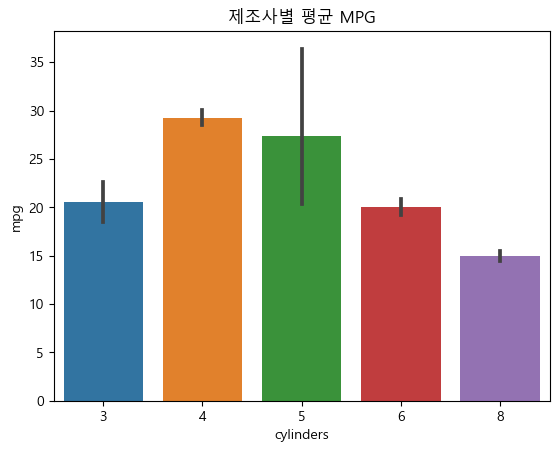

In [7]:
sns.barplot(y='mpg',x='cylinders',data=mpg)
plt.title('실린더별 평균 MPG');

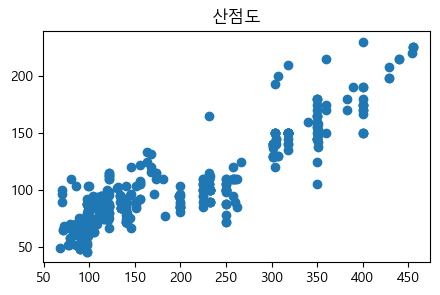

In [8]:
X, Y = mpg.displacement,mpg.horsepower,           
plt.figure(figsize=(5,3))
plt.scatter(X,Y)
plt.title('산점도');

In [9]:
mpg['manufacturer'] = mpg.name.apply(lambda x:x.split()[0])
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [10]:
model_counts = mpg.groupby('manufacturer').size()
print(model_counts[:10])

manufacturer
amc          28
audi          7
bmw           2
buick        17
cadillac      2
capri         1
chevroelt     1
chevrolet    43
chevy         3
chrysler      6
dtype: int64


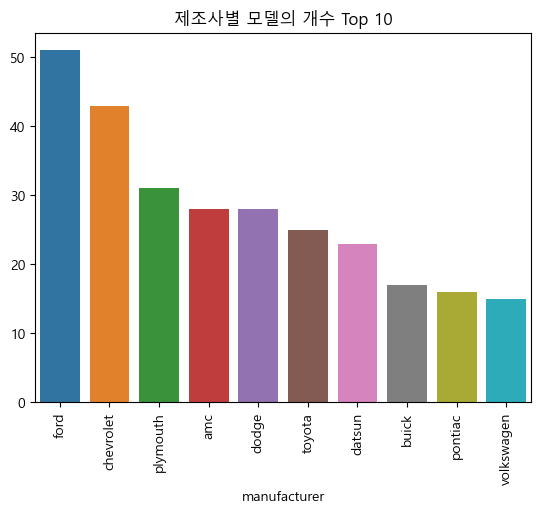

In [11]:
model_counts = mpg.groupby('manufacturer').size().sort_values(ascending=False).head(10)
plt.title('제조사별 모델의 개수 Top 10')
sns.barplot(x=model_counts.index, y=model_counts.values)
plt.xticks(rotation=90);


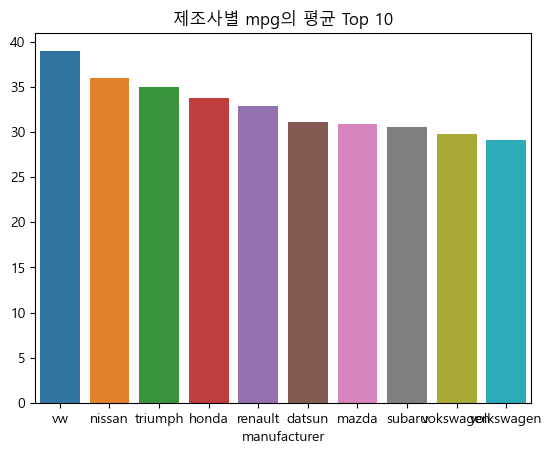

In [12]:
mean_mpg = mpg.groupby('manufacturer')['mpg'].mean().sort_values(ascending=False).head(10)
plt.title('제조사별 mpg의 평균 Top 10')
sns.barplot(x=mean_mpg.index, y=mean_mpg.values);


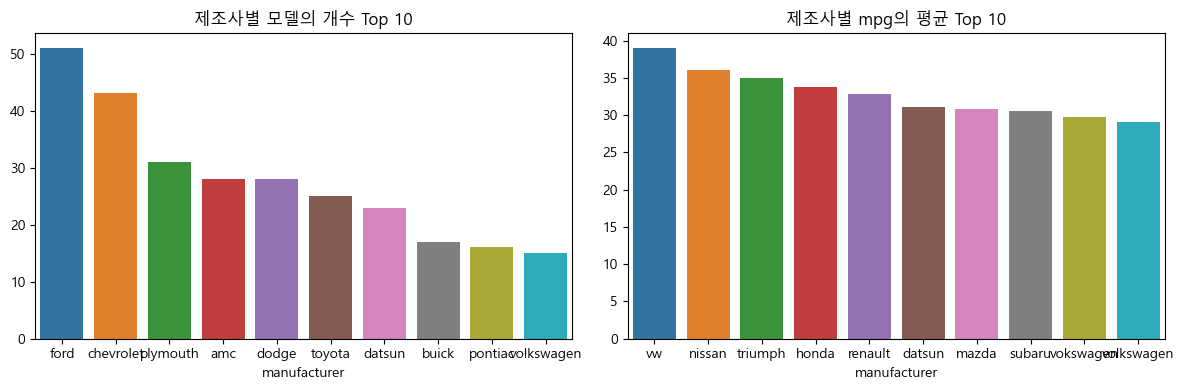

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x=model_counts.index, y=model_counts.values, ax=ax1)
ax1.set_title('제조사별 모델의 개수 Top 10')
sns.barplot(x=mean_mpg.index, y=mean_mpg.values, ax=ax2)
ax2.set_title('제조사별 mpg의 평균 Top 10')
plt.tight_layout();